In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
PATH = 'clustersData_no_light_FINAL_new/0'

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

names = list(df.name)

In [19]:
df.columns

Index(['spatial_dispersion_count', 'spatial_dispersion_sd',
       'spatial_dispersion_area', 'geometrical_shift', 'geometrical_shift_sd',
       'graph_avg_speed', 'graph_slowest_path', 'graph_fastest_path',
       'dep_red', 'dep_sd', 'fzc_red', 'fzc_sd', 'szc_red', 'szc_sd',
       'break_measure', 'fwhm', 'get_acc', 'max_speed', 'peak2peak',
       'trough2peak', 'rise_coef', 'smile_cry', 't_time', 'd_kl_start',
       'd_kl_mid', 'jump', 'psd_center', 'der_psd_center', 'rise_time',
       'unif_dist', 'num_spikes', 'max_abs', 'name', 'region', 'label'],
      dtype='object')

In [21]:
df_morph = df[df.columns[14: 22]]
df_morph.columns

Index(['break_measure', 'fwhm', 'get_acc', 'max_speed', 'peak2peak',
       'trough2peak', 'rise_coef', 'smile_cry'],
      dtype='object')

In [27]:
df_temporal = df[df.columns[23: 30]]
df_temporal.columns

Index(['d_kl_start', 'd_kl_mid', 'jump', 'psd_center', 'der_psd_center',
       'rise_time', 'unif_dist'],
      dtype='object')

In [8]:
labels = df.label
df_spatial = df[df.columns[: 14]]
df_spatial.columns

Index(['spatial_dispersion_count', 'spatial_dispersion_sd',
       'spatial_dispersion_area', 'geometrical_shift', 'geometrical_shift_sd',
       'graph_avg_speed', 'graph_slowest_path', 'graph_fastest_path',
       'dep_red', 'dep_sd', 'fzc_red', 'fzc_sd', 'szc_red', 'szc_sd'],
      dtype='object')

In [9]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df_spatial)

(940, 2)

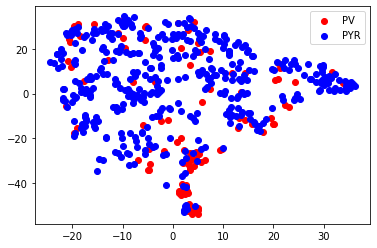

In [26]:
plt.scatter(X_embedded[:,0][labels==0], X_embedded[:,1][labels==0], c='r', label='PV')
plt.scatter(X_embedded[:,0][labels==1], X_embedded[:,1][labels==1], c='b', label='PYR')
#plt.scatter(X_embedded[:,0][labels<0], X_embedded[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()

In [22]:
X_embedded_morph = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df_morph)

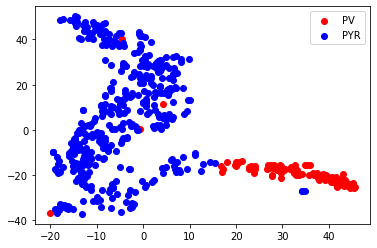

In [25]:
plt.scatter(X_embedded_morph[:,0][labels==0], X_embedded_morph[:,1][labels==0], c='r', label='PV')
plt.scatter(X_embedded_morph[:,0][labels==1], X_embedded_morph[:,1][labels==1], c='b', label='PYR')
#plt.scatter(X_embedded_morph[:,0][labels<0], X_embedded_morph[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()

In [33]:
df_non_nan = df.dropna()
labels = df_non_nan.label
df_temporal = df_non_nan[df_non_nan.columns[23: 30]]
df_temporal.columns

Index(['d_kl_start', 'd_kl_mid', 'jump', 'psd_center', 'der_psd_center',
       'rise_time', 'unif_dist'],
      dtype='object')

In [34]:
X_embedded_temporal = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df_temporal.dropna())

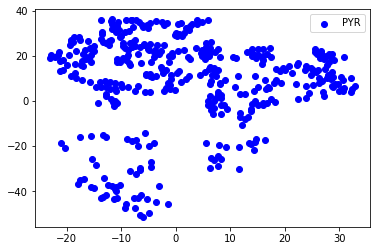

In [37]:
#plt.scatter(X_embedded_temporal[:,0][labels==0], X_embedded_temporal[:,1][labels==0], c='r', label='PV')
plt.scatter(X_embedded_temporal[:,0][labels==1], X_embedded_temporal[:,1][labels==1], c='b', label='PYR')
#plt.scatter(X_embedded_temporal[:,0][labels<0], X_embedded_temporal[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()

In [39]:
df_ca1 = df[df.region==1]

In [41]:
labels_ca1 = df_ca1.label
df_spatial = df_ca1[df_ca1.columns[: 14]]
df_spatial.columns

Index(['spatial_dispersion_count', 'spatial_dispersion_sd',
       'spatial_dispersion_area', 'geometrical_shift', 'geometrical_shift_sd',
       'graph_avg_speed', 'graph_slowest_path', 'graph_fastest_path',
       'dep_red', 'dep_sd', 'fzc_red', 'fzc_sd', 'szc_red', 'szc_sd'],
      dtype='object')

In [42]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df_spatial)

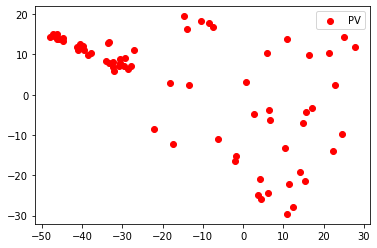

In [45]:
plt.scatter(X_embedded[:,0][labels==0], X_embedded[:,1][labels==0], c='r', label='PV')
#plt.scatter(X_embedded[:,0][labels==1], X_embedded[:,1][labels==1], c='b', label='PYR')
#plt.scatter(X_embedded[:,0][labels<0], X_embedded[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()

In [47]:
X_PV = X_embedded[labels==0]
X_PV = X_PV[X_PV[:, 0] < - 20]
X_PV = X_PV[X_PV[:, 1] > 0]
X_PV.size

62

In [48]:
X_embedded[labels==0].size

138

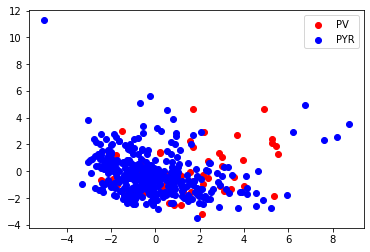

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_spatial)
spat_scaled = scaler.transform(df_spatial)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(spat_scaled)
spat_pca = pca.transform(spat_scaled)

plt.scatter(spat_pca[:,0][labels==0], spat_pca[:,1][labels==0], c='r', label='PV')
plt.scatter(spat_pca[:,0][labels==1], spat_pca[:,1][labels==1], c='b', label='PYR')
#plt.scatter(spat_pca[:,0][labels<0], spat_pca[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()

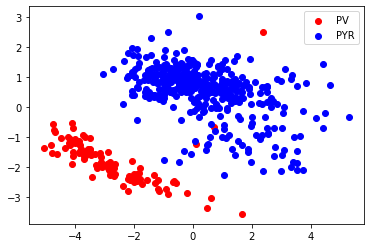

In [55]:
labels= df.label

scaler = StandardScaler()
scaler.fit(df_morph)
morph_scaled = scaler.transform(df_morph)

pca = PCA(n_components=2)
pca.fit(morph_scaled)
morph_pca = pca.transform(morph_scaled)

plt.scatter(morph_pca[:,0][labels==0], morph_pca[:,1][labels==0], c='r', label='PV')
plt.scatter(morph_pca[:,0][labels==1], morph_pca[:,1][labels==1], c='b', label='PYR')
#plt.scatter(morph_pca[:,0][labels<0], morph_pca[:,1][labels<0], c='k', label='UT')
plt.legend()
plt.show()